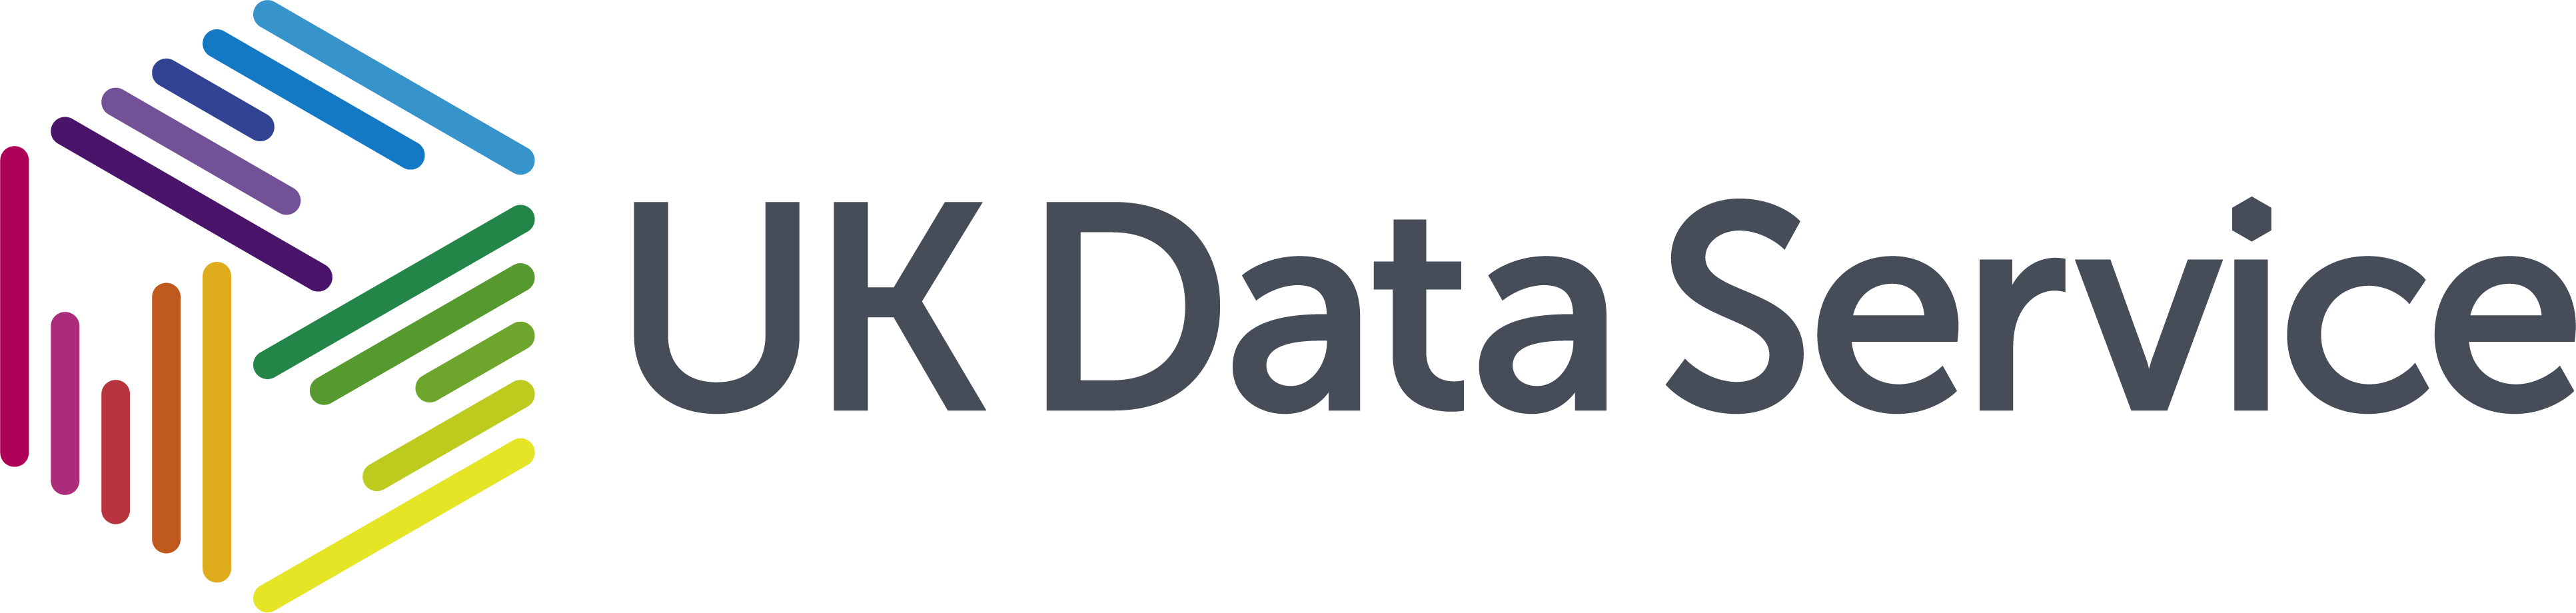

# Guide

In this guide, you'll be shown how to make 3 key types of interactive visualisations, which include:

* Basic bar chart + group and stacked 
* Scatterplot + dropdown menu
* Line graph

To create these visualisations we'll be using the plotly package, which includes plotly.express and plotly.graph_objects.

Datasets used in this workshop are from the 2021 census, and involve the new voluntary question which focuses on gender identity. In particular, we explore the relationship between age and gender identity, as well as ethnicity and gender identity.

Let's get started by importing the necessary packages.

**NOTE:** If you're not following along with Binder, and you have your own computational environment, make sure you install the necessary packages through the command line before proceeding to import. 

# Install packages

Uncomment the lines below to install the packages if you're not working in Binder.

In [155]:
# !pip install pandas 
# !pip install plotly

# Import packages

In [156]:
# Allows us to read-in csv files, and used for data manipulation
import pandas as pd

# Used to create regular expressions to match strings
import re

# Used to create interactive visualisations 
import plotly.express as px
import plotly.graph_objects as go

# Dataset 1

The first dataset that we'll be focusing on is a really simple dataset which shows the total counts for 8 gender identity categories across England and Wales. We'll do a bit of data cleaning, remove unnecessary categories (such as 'Does not apply'), and then calculate the % of each gender identity category. Then, we'll create a simple interactive bar chart which displays the percentage by gender identity category, whilst enabling some interactivity when we hover over each bar.

In [157]:
# Load in dataset 

df = pd.read_csv('../Data/GI_det_EW.csv')

In [158]:
# Brief glimpse of data structure

df.head(10)

England and Wales Code  England and Wales  \
0              K04000001  England and Wales   
1              K04000001  England and Wales   
2              K04000001  England and Wales   
3              K04000001  England and Wales   
4              K04000001  England and Wales   
5              K04000001  England and Wales   
6              K04000001  England and Wales   
7              K04000001  England and Wales   

   Gender identity (8 categories) Code  \
0                                   -8   
1                                    1   
2                                    2   
3                                    3   
4                                    4   
5                                    5   
6                                    6   
7                                    7   

                      Gender identity (8 categories)  Observation  
0                                     Does not apply            0  
1  Gender identity the same as sex registered at ...     45389635  
2  Gender identity different from sex registered ...       117775  
3                                        Trans woman        47572  
4                                          Trans man        48435  
5                                         Non-binary        30257  
6                        All other gender identities        18074  
7                                       Not answered      2914625

In [159]:
# Use .shape to return number of (rows, columns)

df.shape

(8, 5)

## Data cleaning

* Clean column names 
* Filter out unecessary categories
* Clean gender identity category values - too wordy

### Code explanation: List comprehension

Okay, so we have our 'df.columns' variable, which is a list of our df's column names. We're using a 'list comprehension' (which is the for loop within the square brackets) to iterate through each column name and substitute any instance of text within parentheses (inc. the parentheses themselves) with an empty string. The result, i.e., the list of cleaned column names is then assigned back to 'df.columns'.

In [160]:
# Finds all substrings which match the regular expression and replaces them with empty string
# string - just another word for text
# substring - part of a string

df.columns = [re.sub(r"\s*\([^)]*\)", "", col) for col in df.columns]

In [161]:
# Check if it worked

df.columns

Index(['England and Wales Code', 'England and Wales', 'Gender identity Code',
       'Gender identity', 'Observation'],
      dtype='object')

In [162]:
# Lowercase all text and replace empty text with a "_"

df.columns = [col.lower().replace(" ", "_") for col in df.columns]

In [163]:
# Let's see if it worked

df.columns

Index(['england_and_wales_code', 'england_and_wales', 'gender_identity_code',
       'gender_identity', 'observation'],
      dtype='object')

### Code explanation: Subsetting a dataframe

Alrighty. You can see we have our df, and we want to filter it by a specific condition. To do this we use square brackets (which are used in python for indexing operations) which contain our condition 'df.gender_identity_code != -8'. Only the rows where this condition is 'True' are selected. 

After we have removed rows that don't meet this condition it is good practice to use the pandas .reset_index() function, which resets the index to a sequential order.

Finally, this filtered dataset is assigned back to the original variable 'df'. Often it's good practice to create a new variable name for the reduced dataframe, but I'm working with a fairly simple, small dataset so I'm not going to bother.

In [164]:
# Get rid of columns that do not apply and reset index

df = df[df.gender_identity_code != -8].reset_index(drop = True) 

In [165]:
# Use the .unique() function on a column name to view unique values

df.gender_identity_code.unique()

array([1, 2, 3, 4, 5, 6, 7])

In [166]:
df.gender_identity.unique()

array(['Gender identity the same as sex registered at birth',
       'Gender identity different from sex registered at birth but no specific identity given',
       'Trans woman', 'Trans man', 'Non-binary',
       'All other gender identities', 'Not answered'], dtype=object)

### Code explanation: Using replace() function

Here we're updating the values in the 'gender_identity' column by using the .replace() function. This function takes a dictionary of key-value pairs as its argument. The keys in the dictionary represent the original column entries, and the values are the new entries we want to replace them with. Specifically, we are changing 'Gender identity the same as sex registered at birth' to 'Cisgender' and 'Gender identity different from sex registered at birth but no specific identity given' to 'Gender identity different from sex'.

In [167]:
df['gender_identity'] = df['gender_identity'].replace({'Gender identity the same as sex registered at birth': 'Cisgender', 'Gender identity different from sex registered at birth but no specific identity given': 'Gender identity different from sex'})

In [168]:
df.gender_identity.unique()

array(['Cisgender', 'Gender identity different from sex', 'Trans woman',
       'Trans man', 'Non-binary', 'All other gender identities',
       'Not answered'], dtype=object)

## Data pre-processing

Before we can plot our data, we need to calculate the percentage of each gender identity category.

In [169]:
# For each row in df.observation we divide the value by the sum of observations
# Then assign result for each row to a new column titled 'percentage'

df['percentage'] = round(df['observation'] / df['observation'].sum() * 100, 2)



In [170]:
df.head()

england_and_wales_code  england_and_wales  gender_identity_code  \
0              K04000001  England and Wales                     1   
1              K04000001  England and Wales                     2   
2              K04000001  England and Wales                     3   
3              K04000001  England and Wales                     4   
4              K04000001  England and Wales                     5   

                      gender_identity  observation  percentage  
0                           Cisgender     45389635       93.46  
1  Gender identity different from sex       117775        0.24  
2                         Trans woman        47572        0.10  
3                           Trans man        48435        0.10  
4                          Non-binary        30257        0.06

## Basic interactive bar chart

Now we can create our first simple interactive visualisation. To do so we use Plotly express' .bar method, and supply the parameters with the necessary arguments. Parameters are the variables in a function, so below we have:

* data_frame
* x
* y
* title

Arguments are the actual values or data that we pass to the function when we call it. These include:

* df
* 'gender_identity'
* 'percentage'
* 'Percentage of Each Gender Identity in England and Wales'

**TLDR: Parameters define what kind of input a function can accept. Arguments are the actual data we pass to the function.**


In [171]:
# Create the bar chart visualization with percentages on the y-axis

fig = px.bar(data_frame=df,
                        x='gender_identity',
                        y='percentage',
                        title='Percentage of Each Gender Identity in England and Wales',
                        # Define y-axis and x-axis label names
                        labels={'percentage': 'Percentage (Log Scale)', 'gender_identity': 'Gender Identity'},
                        width=800,
                        height=600,
                        log_y = True)


fig.show()

## Tooltips

When using different Python libraries geared towards interactive visualisations, you'll often come across 'tooltips'. These are small boxes that provide information when a user hovers over a part of a data visualisation such as: a point on a graph, a bar in a bar chart, or a segment in a pie chart. They are used to display additional information about the data point or object, providing more context without cluttering up the chart. In Plotly tooltips are referred to as 'hover_data'.

All interactive plotly graphs come with default hover data, so when you scroll over a bar or a scatterplot data point it will display the specific x-axis value and y-axis value. But, variety is the spice of life and there's going to be times when you want to leverage this feature to include interesting info that isn't included by default. For instance, for our bar chart, I'd like to add in data from the 'Observation' column, which shows the raw count for each gender identity category.

To do this it's quite easy,

When creating them you'll often use a dictionary {} with a key:value, with keys representing the column you'd like to show, and the value representing how you'd like the column data to be displayed, or a True/False value to show or hide the column. By default, Plotly will show the x and y axis data, as well as the data that defines the colour of the bars.

In [172]:
# Let's define our hover_data to remove x and y values, and add in observation column

hover_data = {'observation': True,
              # .2 specifies how many digits to display after decimal point
              # f indicates the number is a floating-point type
              'percentage': ':.2f',
              # Let's get rid of this, as we already have our x-axis tick labels
             'gender_identity': False}

In [173]:
# Unfortunately, we'll have to re-create the graph from scratch

fig = px.bar(data_frame=df,
                        x='gender_identity',
                        y='percentage',
             # Set the y-axis to logarithmic scale
                        log_y = True,
                        title='Percentage of Each Gender Identity in England and Wales',
                # Add in hover_data
                        hover_data = hover_data,
                        labels={'percentage': 'Percentage (Log Scale)', 'gender_identity': 'Gender Identity'},
                        width=800,
                        height=600)


## Update_traces() method

In [174]:
fig.update_traces(
    hovertemplate='<b>Gender Identity</b>: %{x}<br>' +
                  '<b>Percentage</b>: %{y:.2f}%<br>' +
                  '<b>Observation</b>: %{customdata[0]}<extra></extra>',
    customdata=df[['observation']]
)

## Update_layout() method

Once a graph has been created, we can use the update_layout method to customise the appearance and layout. This allows you to modify things such as titles, legend details, axis propertis, etc, without needing to recreate the figure from scratch. For now, let's simply center our graph title.

In [175]:
# Update the layout to center the title

fig.update_layout(title_x=0.5)


fig.show()

# Dataset 2

This dataset classifies residents by gender identity and age, with the unit of analysis being England and Wales.

In [176]:
# Load in dataset

df2 = pd.read_csv('../Data/GI_age.csv')

In [177]:
# Brief glimpse of data structure

df2.head(10)

England and Wales Code  England and Wales  \
0              K04000001  England and Wales   
1              K04000001  England and Wales   
2              K04000001  England and Wales   
3              K04000001  England and Wales   
4              K04000001  England and Wales   
5              K04000001  England and Wales   
6              K04000001  England and Wales   
7              K04000001  England and Wales   
8              K04000001  England and Wales   
9              K04000001  England and Wales   

   Gender identity (7 categories) Code  \
0                                   -8   
1                                   -8   
2                                   -8   
3                                   -8   
4                                   -8   
5                                   -8   
6                                    1   
7                                    1   
8                                    1   
9                                    1   

                      Gender identity (7 categories)  Age (6 categories) Code  \
0                                     Does not apply                        1   
1                                     Does not apply                        2   
2                                     Does not apply                        3   
3                                     Does not apply                        4   
4                                     Does not apply                        5   
5                                     Does not apply                        6   
6  Gender identity the same as sex registered at ...                        1   
7  Gender identity the same as sex registered at ...                        2   
8  Gender identity the same as sex registered at ...                        3   
9  Gender identity the same as sex registered at ...                        4   

        Age (6 categories)  Observation  
0  Aged 15 years and under            0  
1      Aged 16 to 24 years            0  
2      Aged 25 to 34 years            0  
3      Aged 35 to 49 years            0  
4      Aged 50 to 64 years            0  
5   Aged 65 years and over            0  
6  Aged 15 years and under            0  
7      Aged 16 to 24 years      5809658  
8      Aged 25 to 34 years      7518377  
9      Aged 35 to 49 years     10829667

In [178]:
# Use .shape to return number of (rows, columns)

df2.shape

(42, 7)

## Data cleaning

* Clean column names
* Filter out unnecessary categories
* Clean gender identity columns - too wordy

We'll whiz through this, because it's the same stuff we did for the last dataset.

In [179]:
# Finds all substrings which match the regular expression and replaces them with empty string
# string - just another word for text
# substring - part of a string

df2.columns = [re.sub(r"\s*\([^)]*\)", "", col) for col in df2.columns]

In [180]:
# Lowercase all text and replace empty text with a "_"

df2.columns = [col.lower().replace(" ", "_") for col in df2.columns]

In [181]:
df2.head()

england_and_wales_code  england_and_wales  gender_identity_code  \
0              K04000001  England and Wales                    -8   
1              K04000001  England and Wales                    -8   
2              K04000001  England and Wales                    -8   
3              K04000001  England and Wales                    -8   
4              K04000001  England and Wales                    -8   

  gender_identity  age_code                      age  observation  
0  Does not apply         1  Aged 15 years and under            0  
1  Does not apply         2      Aged 16 to 24 years            0  
2  Does not apply         3      Aged 25 to 34 years            0  
3  Does not apply         4      Aged 35 to 49 years            0  
4  Does not apply         5      Aged 50 to 64 years            0

In [182]:
# Get rid of columns that do not apply and reset index

df2 = df2[df2.gender_identity_code != -8].reset_index(drop = True) 

In [183]:
df2.gender_identity_code.unique()

array([1, 2, 3, 4, 5, 6])

In [184]:
df2 = df2[df2.age_code != 1] 

In [185]:
df2.age_code.unique()

array([2, 3, 4, 5, 6])

In [186]:
df2['gender_identity'] = df2['gender_identity'].replace({'Gender identity the same as sex registered at birth': 'Cisgender', 'Gender identity different from sex registered at birth but no specific identity given': 'Gender identity different from sex'})

In [187]:
df2.gender_identity.unique()

array(['Cisgender', 'Gender identity different from sex', 'Trans woman',
       'Trans man', 'All other gender identities', 'Not answered'],
      dtype=object)

### Code explanation: Using str.replace() function

Here we're updating the values in the age column by using the str.replace() function multiple times. This function is used to replace specific substrings within each string in the column with new substrings

In [188]:
# Chain str.replace() calls together to apply multiple string replacements in succession
# Each .replace() call is applied to the result of the previous one
# Assign new column values back to the age column

df2['age'] = df2['age'].str.replace('Aged ', '').str.replace('to', '-').str.replace(' years', '').str.replace(' and over', '+').str.replace(' ', '')


In [189]:
df2.age.unique()

array(['16-24', '25-34', '35-49', '50-64', '65+'], dtype=object)

## Question

How is gender identity distributed among different age groups?

Some subquestions that this can help us answer:

* What % of trans women are aged 16-24 years?
* Are older age groups over represented in the 'non-response' category?

## Data pre-processing

### Calculate percentages

Below, we use the groupby function to group the data by gender identity and sum the observations within that category. Then, we divide the observations in each row by the total observations per gender identity category, multiply the results by 100 and assign the values to a new column titled 'percentage'.

### Code explanation: groupby() function

Below, we're creating a new series (data structure for a single column of a dataframe) called 'total_observation_per_category', by using the groupby() function. This function allows us to group the df2 by a specific column (gender_identity), and then perform an aggregate operation on another column (observation).

Specifically, we are summing the 'observation' values within each 'gender_identity' category and assigning this summed value back to each row in the new series 'total_observation_per_category'.

In [190]:
total_observation_per_category = df2.groupby('gender_identity')['observation'].transform('sum')

In [191]:
total_observation_per_category

1     45389635
2     45389635
3     45389635
4     45389635
5     45389635
7       117775
8       117775
9       117775
10      117775
11      117775
13       47572
14       47572
15       47572
16       47572
17       47572
19       48435
20       48435
21       48435
22       48435
23       48435
25       48331
26       48331
27       48331
28       48331
29       48331
31     2914623
32     2914623
33     2914623
34     2914623
35     2914623
Name: observation, dtype: int64

In [192]:
# Calculate the percentage for each row
df2['percentage'] = (df2['observation'] / total_observation_per_category) * 100

In [193]:
# Round the percentages to 2 decimal places
df2['percentage'] = df2['percentage'].round(2)

In [194]:
df2.head(10)

england_and_wales_code  england_and_wales  gender_identity_code  \
1               K04000001  England and Wales                     1   
2               K04000001  England and Wales                     1   
3               K04000001  England and Wales                     1   
4               K04000001  England and Wales                     1   
5               K04000001  England and Wales                     1   
7               K04000001  England and Wales                     2   
8               K04000001  England and Wales                     2   
9               K04000001  England and Wales                     2   
10              K04000001  England and Wales                     2   
11              K04000001  England and Wales                     2   

                       gender_identity  age_code    age  observation  \
1                            Cisgender         2  16-24      5809658   
2                            Cisgender         3  25-34      7518377   
3                            Cisgender         4  35-49     10829667   
4                            Cisgender         5  50-64     10966023   
5                            Cisgender         6    65+     10265910   
7   Gender identity different from sex         2  16-24        16590   
8   Gender identity different from sex         3  25-34        28375   
9   Gender identity different from sex         4  35-49        38280   
10  Gender identity different from sex         5  50-64        21678   
11  Gender identity different from sex         6    65+        12852   

    percentage  
1        12.80  
2        16.56  
3        23.86  
4        24.16  
5        22.62  
7        14.09  
8        24.09  
9        32.50  
10       18.41  
11       10.91

# Interactive grouped bar chart + stacked bar chart

When creating grouped bar charts, there's a few subtle differences that you'll need to account for in the code.
First, we'll need to make sure this is a grouped bar chart, which we can set with the 'barmode' parameter.
Second, we'll need a way to colour each bar in each group, according to age categories, which we can do with the 'color' parameter.

In [195]:
# Let's define our hover_data to remove x and y values, and add in observation column

hover_data = {'observation': True,
              # .2 specifies how many digits to display after decimal point
              # f indicates the number is a floating-point type
              'percentage': ':.2f%',
              # Let's get rid of this, as we already have our x-axis tick labels
             'gender_identity': False,
             'age': True}

In [196]:


# First let's create our graph

fig2 = px.bar(data_frame=df2, 
             x='gender_identity', 
             y='percentage', 
             color='age', 
             barmode='group', 
             hover_data = hover_data,
             title = 'Distribution of Gender Identity Categories Among Age Groups',
             labels={'percentage': 'Percentage', 'gender_identity': 'Gender Identity'},
             width = 800, 
             height = 600) 


fig2.show()


## Interactive legends

By default Plotly's legends are interactive. When you click on a legend category, it hides all data associated with that category. Double-click a category in the legend to focus only on that category. This in-built functionality allows us to easily explore patterns and trends in our data. 


## Styling/adjust graph layout

As you can see our default graph looks alright! We could probably improve it using update_layout() by just centering the main title. Also, we could maybe try moving our legend so that it appears at the bottom right of the graph.



In [197]:
### Use update_layout to adjust the size of the graph, move the legend, and add titles

fig2.update_layout(title_x = 0.5,
                  
    # Move the legend below the plot
    legend=dict(
        orientation="v",
        yanchor="top",
        y=-0.4,
        xanchor="center",
        x=1.1,
        title_text = "Age"
    ))


In [198]:
fig2.update_traces(
    hovertemplate= '<b>Percentage</b>: %{y:.2f}%<br>' +
                  '<b>Observation</b>: %{customdata[0]}<extra></extra>',
    customdata=df2[['observation']]
)

## Further styling options..

In [199]:

# Update the layout to make the graph look less basic

fig2.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background within the plot
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background around the plot
    title={
        'text': 'Distribution of Gender Identity Categories Among Age Groups',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    title_font=dict(size=25, color='navy'),
    font=dict(family='Arial, sans-serif', size=18, color='RebeccaPurple'),
    xaxis=dict(tickangle=-45, title_standoff=25),
    xaxis_title_font=dict(size=20, family='Courier', color='black'),
    yaxis_title_font=dict(size=20, family='Courier', color='black'),
    legend=dict(
        title_text='Age Groups',
        bgcolor='rgba(255,255,255,0.5)',
        bordercolor='Black',
        borderwidth=2
    ),
    showlegend=True
)

# Style the bars
fig2.update_traces(
    marker=dict(line=dict(width=1.5, color='DarkSlateGrey')),
    opacity=0.8
)

fig2.show()


## Stacked bar chart

To create a stacked bar chart, we follow the same steps that we did above for our grouped bar chart, only we omit specifying the barmode. Simple as!

In [200]:
import plotly.express as px

fig3 = px.bar(data_frame= df2,
              x='gender_identity', 
              y='percentage', 
              color='age', 
              hover_data = ['observation'],
              title= 'Distribution of Gender Identity Categories Among Age Groups',
              labels={'percentage': 'Percentage', 'gender_identity': 'Gender Identity'},
              width = 800, 
              height = 600)

                        
fig3.show()


In [201]:
fig3.update_layout(
    title_x =0.5)


fig3.show()

## Or...

If you've already created a grouped bar chart, you can use update_layout() to change the barmode.

In [202]:
fig2.update_layout(
    barmode='stack'
)

fig2.show()

# Dataset 3

This dataset classifies residents by gender identity and ethnic group, with the unit of analysis being the 331 local authorities across England and Wales. 

In [203]:
# Load in dataset

df3 = pd.read_csv('../Data/GI_ethnic.csv')

In [204]:
# Brief glimpse at underlying data structure

df3.head(10)

Lower tier local authorities Code Lower tier local authorities  \
0                         E06000001                   Hartlepool   
1                         E06000001                   Hartlepool   
2                         E06000001                   Hartlepool   
3                         E06000001                   Hartlepool   
4                         E06000001                   Hartlepool   
5                         E06000001                   Hartlepool   
6                         E06000001                   Hartlepool   
7                         E06000001                   Hartlepool   
8                         E06000001                   Hartlepool   
9                         E06000001                   Hartlepool   

   Gender identity (4 categories) Code  \
0                                   -8   
1                                   -8   
2                                   -8   
3                                   -8   
4                                   -8   
5                                   -8   
6                                   -8   
7                                   -8   
8                                    1   
9                                    1   

                      Gender identity (4 categories)  \
0                                     Does not apply   
1                                     Does not apply   
2                                     Does not apply   
3                                     Does not apply   
4                                     Does not apply   
5                                     Does not apply   
6                                     Does not apply   
7                                     Does not apply   
8  Gender identity the same as sex registered at ...   
9  Gender identity the same as sex registered at ...   

   Ethnic group (8 categories) Code  \
0                                -8   
1                                 1   
2                                 2   
3                                 3   
4                                 4   
5                                 5   
6                                 6   
7                                 7   
8                                -8   
9                                 1   

                         Ethnic group (8 categories)  Observation  
0                                     Does not apply            0  
1                Asian, Asian British or Asian Welsh            0  
2  Black, Black British, Black Welsh, Caribbean o...            0  
3                    Mixed or Multiple ethnic groups            0  
4  White: English, Welsh, Scottish, Northern Iris...            0  
5                                       White: Irish            0  
6  White: Gypsy or Irish Traveller, Roma or Other...            0  
7                                 Other ethnic group            0  
8                                     Does not apply            0  
9                Asian, Asian British or Asian Welsh         1008

In [205]:
df3.shape

(10592, 7)

## Data Cleaning

* Clean column names
* Filter out unnecessary categories

In [206]:
# Finds all substrings which match the regular expression and replaces them with empty string
# string - just another word for text
# substring - part of a string

df3.columns = [re.sub(r"\s*\([^)]*\)", "", col) for col in df3.columns]

In [207]:
# Lowercase all text and replace empty text with a "_"

df3.columns = [col.lower().replace(" ", "_") for col in df3.columns]

In [208]:
# Let's shorten the local authority column names as they are wayyyy too long

df3.rename(columns={'lower_tier_local_authorities_code':'LA_code', 'lower_tier_local_authorities': 'LA_name'}, inplace=True)

In [209]:
df3.columns

Index(['LA_code', 'LA_name', 'gender_identity_code', 'gender_identity',
       'ethnic_group_code', 'ethnic_group', 'observation'],
      dtype='object')

In [210]:
# Again we have redundant categories...
# Let's get rid of 'Does not apply' for the gender identity and ethnic group column

df3 = df3[(df3.gender_identity_code != -8) & (df3.ethnic_group_code != -8)].reset_index(drop = True) 

In [211]:
# Let's see if it worked..

df3.gender_identity_code.unique()

array([1, 2, 3])

In [212]:
# Let's see if it worked.. 

df3.ethnic_group_code.unique()

array([1, 2, 3, 4, 5, 6, 7])

In [213]:
df3['gender_identity'] = df3['gender_identity'].replace({'Gender identity the same as sex registered at birth': 'Cisgender', 'Gender identity different from sex registered at birth but no specific identity given': 'Gender identity different from sex'})

## Question

How does the rate of 'non-response' on gender identity vary among different ethnic groups across local authorities in England and Wales?

A subquestion this could help us answer:

Does the relationship between non-response and ethnic group % for local authorities differ between the 'White' categories and other ethnic groups?

## Data pre-processing

Given that I want to explore the question above, I'd like to create a scatterplot which explores the relationship between the % of certain ethnic groups within local authorities and their non-response rates. Therefore, I'll need to prep my x and y variables, so I'll need to calculate the percentage of each ethnic group in each LA, and that ethnic groups non-response rate within each LA.  

## Calculate % of each ethnic group in each LA

### Code explanation: groupby() function

Remember that the column we put in the first set of round brackets are the ones we'd like to group together. In this case we want to group our data by each LA name and each ethnic group within that LA. Then, the column that follows in the square brackets is the column we want to perform an aggregate operation on. In this case, we are summing the 'observation' values within each combination of 'LA_name' and 'ethnic_group' categories, and then assigning this summed value to a new column called 'Ethnic_sum' in a new dataframe called 'ethnic_totals'.

In [214]:
# First we're going to group our data by LA_name, ethnic group, and observation and sum our observations 
# Leaves us with the total of each ethnic group in each local authority

ethnic_totals = df3.groupby(['LA_name', 'ethnic_group'])['observation'].sum().reset_index(name='Ethnic_sum')

In [215]:
# Quick glance at our new dataframe

ethnic_totals

LA_name                                       ethnic_group  Ethnic_sum
0       Adur                Asian, Asian British or Asian Welsh        1098
1       Adur  Black, Black British, Black Welsh, Caribbean o...         437
2       Adur                    Mixed or Multiple ethnic groups         898
3       Adur                                 Other ethnic group         563
4       Adur  White: English, Welsh, Scottish, Northern Iris...       47460
...      ...                                                ...         ...
2312    York                    Mixed or Multiple ethnic groups        2412
2313    York                                 Other ethnic group        1574
2314    York  White: English, Welsh, Scottish, Northern Iris...      150522
2315    York  White: Gypsy or Irish Traveller, Roma or Other...        8571
2316    York                                       White: Irish        1226

[2317 rows x 3 columns]

In [216]:
# Calculate total observations for each local authority by grouping df3 by local authority and sum of obs

la_totals = df3.groupby('LA_name')['observation'].sum().reset_index(name='LA_sum')

# Quick glance at new dataframe

la_totals

LA_name  LA_sum
0            Adur   52951
1       Allerdale   80520
2    Amber Valley  105061
3            Arun  139550
4        Ashfield  102847
..            ...     ...
326       Wrexham  110274
327      Wychavon  110716
328          Wyre   94353
329   Wyre Forest   84562
330          York  172082

[331 rows x 2 columns]

### Code explanation: merge() function

Pandas merge function is used to (you guessed it) merge two dataframes together, based on what columns they have in common. You can see that both dataframes share the 'LA_name' column, which is why we choose it as an appropriate column to merge on - hence the 'on' parameter. 

Also, it's important to note that the order in which you place each dataframe in the merge function matters, as it can affect which df's rows are preserved. 

In [217]:
# Merge the ethnic_totals and la_totals dataframes together
# on parameter specifies which column to perform merge on

grp_pct = pd.merge(ethnic_totals, la_totals, on='LA_name')

In [218]:
# Let's check it out

grp_pct

LA_name                                       ethnic_group  Ethnic_sum  \
0       Adur                Asian, Asian British or Asian Welsh        1098   
1       Adur  Black, Black British, Black Welsh, Caribbean o...         437   
2       Adur                    Mixed or Multiple ethnic groups         898   
3       Adur                                 Other ethnic group         563   
4       Adur  White: English, Welsh, Scottish, Northern Iris...       47460   
...      ...                                                ...         ...   
2312    York                    Mixed or Multiple ethnic groups        2412   
2313    York                                 Other ethnic group        1574   
2314    York  White: English, Welsh, Scottish, Northern Iris...      150522   
2315    York  White: Gypsy or Irish Traveller, Roma or Other...        8571   
2316    York                                       White: Irish        1226   

      LA_sum  
0      52951  
1      52951  
2      52951  
3      52951  
4      52951  
...      ...  
2312  172082  
2313  172082  
2314  172082  
2315  172082  
2316  172082  

[2317 rows x 4 columns]

In [219]:
# Calculate the percentage of each ethnic group within each local authority
# Store results in new column

grp_pct['Grp_percentage'] = (grp_pct['Ethnic_sum'] / grp_pct['LA_sum'] * 100).round(2)


In [220]:
grp_pct.head(10)

LA_name                                       ethnic_group  Ethnic_sum  \
0       Adur                Asian, Asian British or Asian Welsh        1098   
1       Adur  Black, Black British, Black Welsh, Caribbean o...         437   
2       Adur                    Mixed or Multiple ethnic groups         898   
3       Adur                                 Other ethnic group         563   
4       Adur  White: English, Welsh, Scottish, Northern Iris...       47460   
5       Adur  White: Gypsy or Irish Traveller, Roma or Other...        2025   
6       Adur                                       White: Irish         470   
7  Allerdale                Asian, Asian British or Asian Welsh         474   
8  Allerdale  Black, Black British, Black Welsh, Caribbean o...          64   
9  Allerdale                    Mixed or Multiple ethnic groups         361   

   LA_sum  Grp_percentage  
0   52951            2.07  
1   52951            0.83  
2   52951            1.70  
3   52951            1.06  
4   52951           89.63  
5   52951            3.82  
6   52951            0.89  
7   80520            0.59  
8   80520            0.08  
9   80520            0.45

## Calculate Ethnic Group NR Rates (%'s) Within LAs

In [221]:
# We already have our ethnic group totals which we can re-use.. 

ethnic_totals

LA_name                                       ethnic_group  Ethnic_sum
0       Adur                Asian, Asian British or Asian Welsh        1098
1       Adur  Black, Black British, Black Welsh, Caribbean o...         437
2       Adur                    Mixed or Multiple ethnic groups         898
3       Adur                                 Other ethnic group         563
4       Adur  White: English, Welsh, Scottish, Northern Iris...       47460
...      ...                                                ...         ...
2312    York                    Mixed or Multiple ethnic groups        2412
2313    York                                 Other ethnic group        1574
2314    York  White: English, Welsh, Scottish, Northern Iris...      150522
2315    York  White: Gypsy or Irish Traveller, Roma or Other...        8571
2316    York                                       White: Irish        1226

[2317 rows x 3 columns]

In [222]:
# Calculate sum of non-responses for each ethnic group within each LA
# Subset df3 so that we only have non-response rows
# Group by LA and ethnic group and sum non-response observations

non_response_totals = df3[df3['gender_identity'] == 'Not answered'].groupby(['LA_name', 'ethnic_group'])['observation'].sum().reset_index(name='NR_total')


In [223]:
# Let's check it out.. 

non_response_totals

LA_name                                       ethnic_group  NR_total
0       Adur                Asian, Asian British or Asian Welsh        61
1       Adur  Black, Black British, Black Welsh, Caribbean o...        36
2       Adur                    Mixed or Multiple ethnic groups        46
3       Adur                                 Other ethnic group        29
4       Adur  White: English, Welsh, Scottish, Northern Iris...      2131
...      ...                                                ...       ...
2312    York                    Mixed or Multiple ethnic groups       208
2313    York                                 Other ethnic group       139
2314    York  White: English, Welsh, Scottish, Northern Iris...      8468
2315    York  White: Gypsy or Irish Traveller, Roma or Other...       678
2316    York                                       White: Irish        77

[2317 rows x 3 columns]

In [224]:
# Merge the ethnic group totals with the ethnic group non-response totals

grp_nr = pd.merge(ethnic_totals, non_response_totals, on=['LA_name', 'ethnic_group'])


In [225]:
grp_nr

LA_name                                       ethnic_group  Ethnic_sum  \
0       Adur                Asian, Asian British or Asian Welsh        1098   
1       Adur  Black, Black British, Black Welsh, Caribbean o...         437   
2       Adur                    Mixed or Multiple ethnic groups         898   
3       Adur                                 Other ethnic group         563   
4       Adur  White: English, Welsh, Scottish, Northern Iris...       47460   
...      ...                                                ...         ...   
2312    York                    Mixed or Multiple ethnic groups        2412   
2313    York                                 Other ethnic group        1574   
2314    York  White: English, Welsh, Scottish, Northern Iris...      150522   
2315    York  White: Gypsy or Irish Traveller, Roma or Other...        8571   
2316    York                                       White: Irish        1226   

      NR_total  
0           61  
1           36  
2           46  
3           29  
4         2131  
...        ...  
2312       208  
2313       139  
2314      8468  
2315       678  
2316        77  

[2317 rows x 4 columns]

In [226]:
# Calculate the non-response percentage for each ethnic group within each LA
# Store results in new column

grp_nr['Eth_NR_perc'] = round((grp_nr['NR_total'] / grp_nr['Ethnic_sum']) * 100, 2)


In [227]:
# Quick glance.. 

grp_nr

LA_name                                       ethnic_group  Ethnic_sum  \
0       Adur                Asian, Asian British or Asian Welsh        1098   
1       Adur  Black, Black British, Black Welsh, Caribbean o...         437   
2       Adur                    Mixed or Multiple ethnic groups         898   
3       Adur                                 Other ethnic group         563   
4       Adur  White: English, Welsh, Scottish, Northern Iris...       47460   
...      ...                                                ...         ...   
2312    York                    Mixed or Multiple ethnic groups        2412   
2313    York                                 Other ethnic group        1574   
2314    York  White: English, Welsh, Scottish, Northern Iris...      150522   
2315    York  White: Gypsy or Irish Traveller, Roma or Other...        8571   
2316    York                                       White: Irish        1226   

      NR_total  Eth_NR_perc  
0           61         5.56  
1           36         8.24  
2           46         5.12  
3           29         5.15  
4         2131         4.49  
...        ...          ...  
2312       208         8.62  
2313       139         8.83  
2314      8468         5.63  
2315       678         7.91  
2316        77         6.28  

[2317 rows x 5 columns]

# Merge both datasets 

Now that we've completed the necessary calculations, we are left with two datasets:

* grp_pct - details the % of each ethnic group in each LA
* grp_nr - details the ethnic group non-response % in each LA

All we need to do now then, is merge these datasets together so that we can access the new columns and plot them:

* Grp_percentage 
* Eth_NR_perc


In [228]:
# Merge the non-response data with the percentage of each ethnic group within each LA
# For merged I isolate the columns I want to preserve in the merge, LA_sum is redundant.. 
# how parameter specifies what type of join to perform - in this case a left join 

nr = pd.merge(grp_nr, grp_pct[['LA_name', 'ethnic_group', 'Grp_percentage']], on=['LA_name', 'ethnic_group'], how='left')

# This gives you the final dataset with both our x and y values
nr = nr.reset_index(drop=True)

# Quick glance
nr

LA_name                                       ethnic_group  Ethnic_sum  \
0       Adur                Asian, Asian British or Asian Welsh        1098   
1       Adur  Black, Black British, Black Welsh, Caribbean o...         437   
2       Adur                    Mixed or Multiple ethnic groups         898   
3       Adur                                 Other ethnic group         563   
4       Adur  White: English, Welsh, Scottish, Northern Iris...       47460   
...      ...                                                ...         ...   
2312    York                    Mixed or Multiple ethnic groups        2412   
2313    York                                 Other ethnic group        1574   
2314    York  White: English, Welsh, Scottish, Northern Iris...      150522   
2315    York  White: Gypsy or Irish Traveller, Roma or Other...        8571   
2316    York                                       White: Irish        1226   

      NR_total  Eth_NR_perc  Grp_percentage  
0           61         5.56            2.07  
1           36         8.24            0.83  
2           46         5.12            1.70  
3           29         5.15            1.06  
4         2131         4.49           89.63  
...        ...          ...             ...  
2312       208         8.62            1.40  
2313       139         8.83            0.91  
2314      8468         5.63           87.47  
2315       678         7.91            4.98  
2316        77         6.28            0.71  

[2317 rows x 6 columns]

# Interactive scatterplot

In this section we're going to:

1. **Create a simple scatterplot** exploring the relationship between the percentage of asian citizens within local authorities and their non-response rates 

2. Implement a widget and **update our scatterplot with a 'python callback'**


In [229]:
# Subset dataframe so that we only have responses from the asian ethnic group
# Remember to reset_index() so our rows are in order

asian = nr[nr.ethnic_group == 'Asian, Asian British or Asian Welsh'].reset_index(drop = True)

In [230]:
# Check it out..

asian.head()

LA_name                         ethnic_group  Ethnic_sum  NR_total  \
0          Adur  Asian, Asian British or Asian Welsh        1098        61   
1     Allerdale  Asian, Asian British or Asian Welsh         474        44   
2  Amber Valley  Asian, Asian British or Asian Welsh         977        67   
3          Arun  Asian, Asian British or Asian Welsh        2117       162   
4      Ashfield  Asian, Asian British or Asian Welsh        1502       129   

   Eth_NR_perc  Grp_percentage  
0         5.56            2.07  
1         9.28            0.59  
2         6.86            0.93  
3         7.65            1.52  
4         8.59            1.46

In [236]:
# Let's define our hover_data and add in some columns

hover_data = {'LA_name': True,
            'Grp_percentage': ':.2f',
              'Eth_NR_perc': ':.2f%',
             'NR_total': True,
             'Ethnic_sum': True}

In [238]:


fig4 = px.scatter(asian, 
                  x = "Grp_percentage", 
                  y = "Eth_NR_perc", 
                  hover_data = hover_data, 
                  trendline = "ols",
                  title = 'Non-response Rates of the Asian Ethnic Group Across Local Authorities',
                  labels = {'Grp_percentage': 'Percentage of ethnic group', 'Eth_NR_perc': 'Non-response rate'},
                  width = 900,
                  height = 900)


fig4.update_layout(
    title_x = 0.5)

# Set marker size
fig4.update_traces(marker_size=7)
fig4.show()

## Dropdown selection

What we're going to do now, is use plotly's 'updatemenus' in conjunction with the 'update' method to create a dropdown where we can switch between the Asian ethnic group, and the White ethnic group to make some comparisons.

### Step 1: Initialise figure and add traces

We'll start by creating a plotly graph_object figure. We use graph objects here instead of plotly express' scatter method, because graph objects offer more control over how plots are constructed. It allows us to add 'traces', which refer to a set of data. In our example, we want to add a trace with the data points relating to our asian ethnic group, and another one for our white ethnic group. This will start to make sense when we look at the code below. 

In [239]:
# Initialize figure
fig5 = go.Figure()


# Let's take a look..
# This is our building block
fig5.show()

In [240]:
# Subset dataframe so we only have responses from the white ethnic group

white = nr[nr.ethnic_group == 'White: English, Welsh, Scottish, Northern Irish or British'].reset_index(drop = True)

In [241]:
# Quick check...

white.head()

LA_name                                       ethnic_group  \
0          Adur  White: English, Welsh, Scottish, Northern Iris...   
1     Allerdale  White: English, Welsh, Scottish, Northern Iris...   
2  Amber Valley  White: English, Welsh, Scottish, Northern Iris...   
3          Arun  White: English, Welsh, Scottish, Northern Iris...   
4      Ashfield  White: English, Welsh, Scottish, Northern Iris...   

   Ethnic_sum  NR_total  Eth_NR_perc  Grp_percentage  
0       47460      2131         4.49           89.63  
1       77948      3532         4.53           96.81  
2      100294      5348         5.33           95.46  
3      124369      6160         4.95           89.12  
4       95369      5187         5.44           92.73

In [243]:
# Add trace for Asian ethnic group

fig5.add_trace(
#     specify graph type - in our case, scatterplot
    go.Scatter(
#         specify x-axis values - subset our dataframe by ethnic group and select Percentage column
        x=asian['Grp_percentage'],
#         specify y-axis values
        y=asian['Eth_NR_perc'],
#         we want marker points for our dps, not lines which is the default
        mode = 'markers',
        marker = dict(size = 10),
#         we want the Asian ethnic group graph to be the default
        visible=True,
        customdata=asian[['LA_name', 'NR_total', 'Ethnic_sum']],
        hovertemplate=
            "<b>LA Name:</b> %{customdata[0]}<br>" +
            "<b>Non-response Total:</b> %{customdata[1]}<br>" +
            "<b>Ethnic Group Total:</b> %{customdata[2]}<br>" +
            "<extra></extra>"  # This hides the trace name from the hover data
    )
    )

# Add trace for the White ethnic group

fig5.add_trace(
    go.Scatter(
        x=white['Grp_percentage'],
        y=white['Eth_NR_perc'],
        name='White',
        mode = 'markers',
        marker = dict(size = 10),
#         we want to hide this ethnic group by default, as we want to use dropdown to switch 
        visible=False,
        customdata=white[['LA_name', 'NR_total', 'Ethnic_sum']],
        hovertemplate=
            "<b>LA Name:</b> %{customdata[0]}<br>" +
            "<b>Non-response Total:</b> %{customdata[1]}<br>" +
            "<b>Ethnic Group Total:</b> %{customdata[2]}<br>" +
            "<extra></extra>"  # This hides the trace name from the hover data
    )
)

# Define dropdown buttons for interactivity
fig5.update_layout(updatemenus=[
#         Inside updatemenus, the dict defines the configuration of a single dropdown menu
        dict(
#             We have a list of dictionaries called 'buttons', and each dictionary represents a button...
#             in the dropdown menu
            buttons=list([
                dict(label="Asian",
#                      specifies action to be performed when button is clicked...
#                      i.e. it will update the graph with the following arguments
                     method="update",
#                      Specify changes, i.e. determines which traces are visible
                     args=[{"visible": [True, False]},
                           {"title": "Non-Response Rates of the Asian Ethnic Group Across Local Authorities"}]),
                dict(label="White",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Non-Response Rates of the White Ethnic Group Across Local Authorities"}]),
            ]),
#             Specifies which direction the menu opens
            direction="down",
#             Highlights the button that is currently active
            showactive=True,
        )
    ]
)

# Set default title and layout properties
fig5.update_layout(
    title_text="Non-Response Rates of the Asian Ethnic Group Across Local Authorities",
    title_x=0.5,  # Centers the title
    xaxis_title="Percentage of Ethnic Group",
    yaxis_title="Non-response Rate",
    width=700,
    height=700
)

# Show figure
fig5.show()

# Dataset 4

This dataset includes sexual identity estimates by gender from 2010 to 2014. This is presented at a UK level, and broken down by England, Wales, Scotland and Northern Ireland. I wanted this guide to include a demo of how to make interactive line graphs with gender identity data, but unfortunately given this is only the first year that the ONS has collected this data that was not possible. So I found a dataset from 2015 which involves experimental statistics that have been used in the Integrated Household Survey. For more info, you can check out this [ONS link](https://www.ons.gov.uk/peoplepopulationandcommunity/culturalidentity/sexuality/datasets/sexualidentitybyagegroupbycountry). 

In [244]:
df4 = pd.read_csv('../Data/cleaned_sexuality_df.csv')

In [245]:
# Brief glimpse at underlying data structure

df4.head(50)

Country Gender                Sexuality  Year  Percentage
0   England    Men  Heterosexual / Straight  2010       93.46
1   England    Men            Gay / Lesbian  2010        1.41
2   England    Men                 Bisexual  2010        0.38
3   England    Men                    Other  2010        0.44
4   England    Men        Don't know/refuse  2010        3.68
5   England    Men             Non-response  2010        0.63
6   England    Men  Heterosexual / Straight  2011       93.61
7   England    Men            Gay / Lesbian  2011        1.43
8   England    Men                 Bisexual  2011        0.39
9   England    Men                    Other  2011        0.38
10  England    Men        Don't know/refuse  2011        3.61
11  England    Men             Non-response  2011        0.58
12  England    Men  Heterosexual / Straight  2012       93.00
13  England    Men            Gay / Lesbian  2012        1.52
14  England    Men                 Bisexual  2012        0.32
15  England    Men                    Other  2012        0.32
16  England    Men        Don't know/refuse  2012        3.66
17  England    Men             Non-response  2012        1.18
18  England    Men  Heterosexual / Straight  2013       91.96
19  England    Men            Gay / Lesbian  2013        1.65
20  England    Men                 Bisexual  2013        0.36
21  England    Men                    Other  2013        0.26
22  England    Men        Don't know/refuse  2013        4.15
23  England    Men             Non-response  2013        1.61
24  England    Men  Heterosexual / Straight  2014       92.24
25  England    Men            Gay / Lesbian  2014        1.54
26  England    Men                 Bisexual  2014        0.32
27  England    Men                    Other  2014        0.31
28  England    Men        Don't know/refuse  2014        3.95
29  England    Men             Non-response  2014        1.63
30  England  Women  Heterosexual / Straight  2010       94.31
31  England  Women            Gay / Lesbian  2010        0.64
32  England  Women                 Bisexual  2010        0.61
33  England  Women                    Other  2010        0.34
34  England  Women        Don't know/refuse  2010        3.61
35  England  Women             Non-response  2010        0.50
36  England  Women  Heterosexual / Straight  2011       94.21
37  England  Women            Gay / Lesbian  2011        0.66
38  England  Women                 Bisexual  2011        0.61
39  England  Women                    Other  2011        0.29
40  England  Women        Don't know/refuse  2011        3.78
41  England  Women             Non-response  2011        0.44
42  England  Women  Heterosexual / Straight  2012       93.51
43  England  Women            Gay / Lesbian  2012        0.74
44  England  Women                 Bisexual  2012        0.55
45  England  Women                    Other  2012        0.25
46  England  Women        Don't know/refuse  2012        3.98
47  England  Women             Non-response  2012        0.97
48  England  Women  Heterosexual / Straight  2013       92.93
49  England  Women            Gay / Lesbian  2013        0.82

## Data cleaning

When I first found this dataset it was very messy and formatted terribly, so I performed some cleaning on it in a separate jupyter notebook, to save cluttering this one and distracting from the main tutorial. If you'd like to see how I cleaned it up, please see the ['Data_cleaning_sexuality.ipynb'](Data_cleaning_sexuality.ipynb) notebook. 

## Data pre-processing

The only pre-processing we're going to do is subset our data so that we have it ready to analyse in the following step.

In [246]:
# Filtering the dataset for England only

england_df = df4[df4['Country'] == 'England']

## Interactive linegraph

By now you probably know the drill. Just like we had our px.bar and px.scatter methods, we have a corresponding one for linegraphs, appropriately named px.line. The parameters used are the same, with the only difference being that we're using:

* facet_row - when we specify a categorical variable here (Gender), this instructs Plotly to create a separate subplot (a row) for each unique value. 

* facet_column - when we specify a categorical variable here (Country), this instructs Plotly to create a separate subplot (a column) for each unique value.

Thus, we get our 2x1 grid of linegraphs. If we added on another country e.g. Scotland, and used these same parameters we'd get a 2x3 grid, and so on. 

## Interactive legends

Again, the cool thing about Plotly's legends is that they are interactive by default. Thus, this allows us to omit values which dominate the graph and obscure our ability to get to the nitty gritty of the data.


In [247]:
# Specify hover_data

hover_data = {'Sexuality': True,
              'Percentage': ':.2f%',
             'Country': False,
             'Year': False,
             'Gender': True}

In [253]:

fig6 = px.line(england_df,
              x='Year',
              y='Percentage',
              color='Sexuality',
              facet_row='Gender',
              facet_col='Country',
              hover_data = hover_data,
              title='Sexuality Percentages by Gender in England (2010-2014)',
              markers=True,
              height = 800,
              width = 1000)

# Enhance the layout for readability
fig6.update_layout(title_x = 0.15,
    legend_title_text='Sexuality')

fig6.show()

In [254]:
# Finally, let's update our x-axis so that it only shows whole years

# dtick "M12" - tells plotly to place a tick every 12 months 
fig6.update_xaxes(dtick="M12", tickformat="%Y")

# Sharing your interactive graphs online


I'm going to provide you first with a really simple way to host Plotly graphs specifically, then we'll look into other more complex options that work with many visualisation packages.

1. Use Plotly's ['Chart Studio'](https://chart-studio.plotly.com/). You can upload your visualisations directly from your coding environment and then get a link to share them online. You'll need to sign up for an account but it's free, unless you want to share the link privately then you'll need to upgrade your account. Otherwise, for data that's fine being out in the open, this is a good option.

2. Embed your graphs in GitHub pages. I'm not going to go into this fully, but if you're interested in doing something like this I recommend looking at GitHub's tutorial: https://pages.github.com/. This is what I used to create a GitHub pages for the UKDS which now acts as a lil website where we can show off cool projects like this one! Might be something to consider if you're a researcher looking to show off your work.